In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [193]:
data = pd.read_csv('tmdb_movies.csv',index_col=0)
data.head()

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0


Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [9]:
filtered_without_3rdQ = data.title[(data.vote_average > data.vote_average.quantile(.75))]
filtered_without_3rdQ.sort_values(ascending=False)[:10]

4066                         [REC]
1988                    Zombieland
421                         Zodiac
3987            Young Frankenstein
4200    You Can't Take It With You
3228       Yeh Jawaani Hai Deewani
3596             Y Tu Mamá También
101             X-Men: First Class
46      X-Men: Days of Future Past
3292             Wuthering Heights
Name: title, dtype: object

Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi. Przykład wykresu widoczny poniżej:

In [195]:
data['release_date'] = pd.to_datetime(data['release_date'],errors='coerce')
data['year'] = data['release_date'].dt.year

In [197]:
data['mean_revenue_groupyear'] = data.groupby('year')['revenue'].transform('mean')
data['mean_revenue_groupyear'].value_counts()
data.columns

Index(['budget', 'homepage', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'status', 'tagline', 'title', 'vote_average', 'vote_count', 'genre_id',
       'year', 'mean_revenue_groupyear'],
      dtype='object')

In [11]:
data['release_date'] = pd.to_datetime(data['release_date'],errors='coerce')
data['year'] = data['release_date'].dt.year
data['year'].
years = data[(data['year'] > 2010) & (data['year'] < 2016)]

# Remove rows with NaT values in 'date' column
data = data.dropna(subset=['release_date'])

In [201]:
data['year'].dropna()

0       2009.0
1       2007.0
2       2015.0
3       2012.0
4       2012.0
         ...  
4798    1992.0
4799    2011.0
4800    2013.0
4801    2012.0
4802    2005.0
Name: year, Length: 4802, dtype: float64

In [207]:

data['mean_budget_groupyear'] = data.groupby('year')['budget'].transform('mean')


In [209]:
data['mean_revenue']=data.revenue.mean()

years = data.year[(data['year'] > 2010) & (data['year'] <= 2016)]
filtered_revenue = data[(data['year'] > 2010) & (data['year'] <= 2016)].mean_revenue_groupyear
filtered_budget= data[(data['year'] > 2010) & (data['year'] <= 2016)].mean_budget_groupyear


In [57]:
data.head(5)

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,...,title,vote_average,vote_count,genre_id,year,mean_budget,mean_revenue,mean_revenue2,mean_revenue_groupyear,mean_budget_groupyear
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,...,Avatar,7.2,11800,28.0,2009.0,2.905109e+07,8.227777e+07,8.531438e+07,8.531438e+07,3.094926e+07
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,...,Pirates of the Caribbean: At World's End,6.9,4500,12.0,2007.0,2.905109e+07,8.227777e+07,8.457242e+07,8.457242e+07,3.073153e+07
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,...,Spectre,6.3,4466,28.0,2015.0,2.905109e+07,8.227777e+07,1.054399e+08,1.054399e+08,3.113216e+07
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,...,The Dark Knight Rises,7.6,9106,28.0,2012.0,2.905109e+07,8.227777e+07,1.160659e+08,1.160659e+08,3.492203e+07
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,...,John Carter,6.1,2124,28.0,2012.0,2.905109e+07,8.227777e+07,1.160659e+08,1.160659e+08,3.492203e+07


C:\Users\szewc\AppData\Local\Temp\ipykernel_287740\1576849586.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(years, filtered_budget,'ro', label='Budget', color='r') #linestyle='-', linewidth=2)


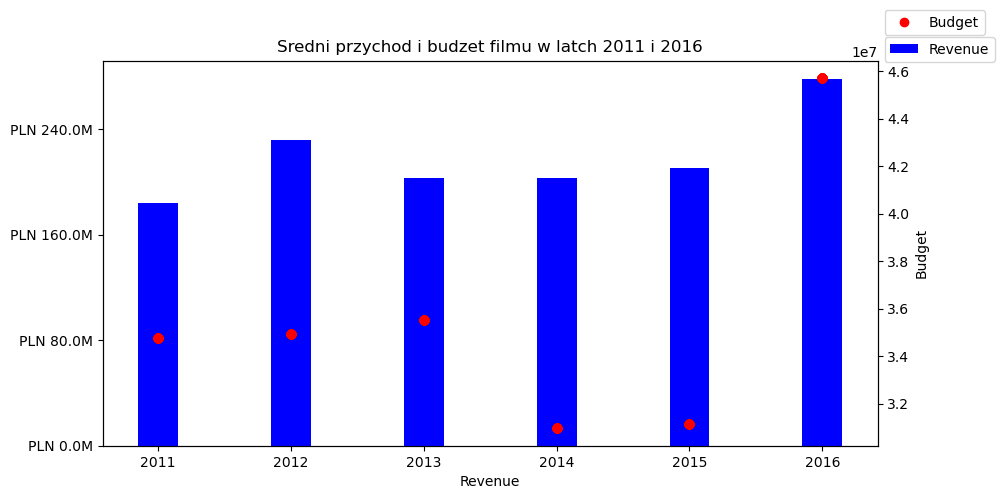

In [215]:
fig, ax1 = plt.subplots(figsize=(10, 5), dpi=100)

def million(x, pos):
        return 'PLN {:2.1f}M'.format(x*2e-6)

formatter = plt.FuncFormatter(million)


years = data.year[(data['year'] > 2010) & (data['year'] <= 2016)]
filtered_revenue = data[(data['year'] > 2010) & (data['year'] <= 2016)].mean_revenue_groupyear
filtered_budget= data.loc[(data['year'] > 2010) & (data['year'] <= 2016),'mean_budget_groupyear']

bar_width = 0.3
ax1.bar(years, filtered_revenue, bar_width, label='Revenue', color='b', align='center')
ax1.yaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_locator(plt.MultipleLocator(40e6))

ax2 = ax1.twinx()
ax2.plot(years, filtered_budget,'ro', label='Budget', color='r') #linestyle='-', linewidth=2




ax1.set_xlabel('Lata')
ax1.set_xlabel('Revenue')
ax2.set_ylabel('Budget')
ax1.set_title('Sredni przychod i budzet filmu w latch 2011 i 2016')
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1.15))
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1.08))



plt.show()

Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.



In [127]:
genres_data = pd.read_csv('tmdb_genres.csv', index_col=False)

In [147]:
genres_data.head()
genres_data = genres_data.rename(columns={'Unnamed: 0':'genre_id'})
genres_data.dropna(inplace=True, how='all')
data.dropna(inplace=True, how='all')
genres_data

,genre_id,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction
5,18.0,Drama
6,53.0,Thriller
7,10751.0,Family
8,35.0,Comedy
9,36.0,History


In [145]:
merged_data = pd.merge(data,genres_data, on = ['genre_id'])
merged_data

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,Adventure
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Action
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,31192,http://downterrace.blogspot.com/,42151,en,Down Terrace,After serving jail time for a mysterious crime...,1.330379,2009-09-01,10000,89.0,Released,You're only as good as the people you know.,Down Terrace,6.3,26,18.0,Drama
1487,27000,http://www.miramax.com/movie/clerks/,2292,en,Clerks,Convenience and video store clerks Dante and R...,19.748658,1994-09-13,3151130,92.0,Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,35.0,Comedy
1488,22000,https://www.facebook.com/DrySpellMovie,255266,en,Dry Spell,Sasha tries to get her soon-to-be ex husband K...,0.048948,2013-02-14,0,90.0,Released,Getting divorced does funny things to a girl,Dry Spell,6.0,1,35.0,Comedy
1489,13,http://tincanmanthemovie.com/,157185,en,Tin Can Man,Recently dumped by his girlfirend for another ...,0.332679,2007-01-01,0,84.0,Released,Everything You've Heard is True,Tin Can Man,2.0,1,27.0,Horror


Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [149]:
merged_data['genres'].value_counts() # Drama pojawia sie najczesciej

genres
Drama              332
Comedy             279
Action             241
Adventure          151
Horror              92
Animation           61
Thriller            61
Crime               57
Fantasy             51
Science Fiction     41
Romance             38
Documentary         27
Family              21
Mystery             13
History              8
Music                7
War                  6
Western              3
TV Movie             1
Foreign              1
Name: count, dtype: int64

In [179]:
genres_runtime_gr = merged_data.groupby('genres')['runtime'].agg('max') 

genres_runtime_gr

genres
Action             165.0
Adventure          201.0
Animation          124.0
Comedy             154.0
Crime              180.0
Documentary        122.0
Drama              195.0
Family             117.0
Fantasy            189.0
Foreign             86.0
History            145.0
Horror             134.0
Music              120.0
Mystery            159.0
Romance            144.0
Science Fiction    165.0
TV Movie            86.0
Thriller           158.0
War                139.0
Western            161.0
Name: runtime, dtype: float64

Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

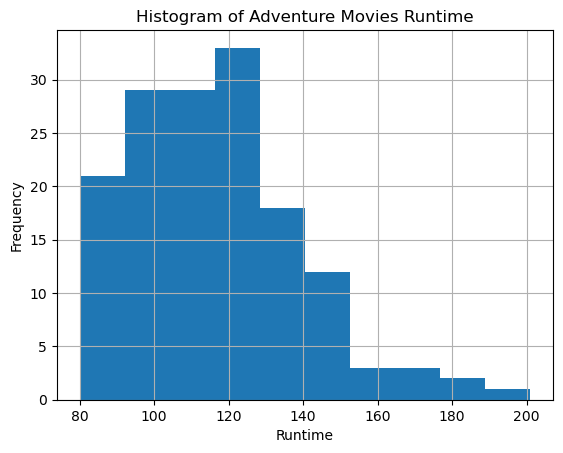

In [189]:
adventure_genres = merged_data[merged_data['genres'] == 'Adventure']
adventure_genres['runtime'].hist()
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Histogram of Adventure Movies Runtime')
plt.show()
